In [11]:
import os
import warnings

import cv2
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline
base_dir = r'C:\Users\gerel\PycharmProjects\Image-process\images'


def show_img(image, plt_size=8):
    fig = plt.figure(figsize=(plt_size, plt_size))
    ax = fig.add_subplot(111)
    ax.imshow(image)


def show_double_img(image1, image2, plt_size=8, gray=False):
    fig = plt.figure(figsize=(plt_size, plt_size))
    ax = fig.add_subplot(121)
    if gray == False:
        ax.imshow(image1)
    else:
        ax.imshow(image1, cmap='gray')
    ax = fig.add_subplot(122)
    if gray == False:
        ax.imshow(image2)
    else:
        ax.imshow(image2, cmap='gray')


def load_img(path):
    img = cv2.imread(path).astype(np.float32) / 255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


def gen_img():
    blank_img = np.zeros((400, 600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='ABCDF', org=(50, 300), fontFace=font, fontScale=5, color=(255, 255, 255), thickness=25)
    return blank_img


def show_img_gray(image, plt_size=8):
    fig = plt.figure(figsize=(plt_size, plt_size))
    ax = fig.add_subplot(111)
    ax.imshow(image, cmap='gray')

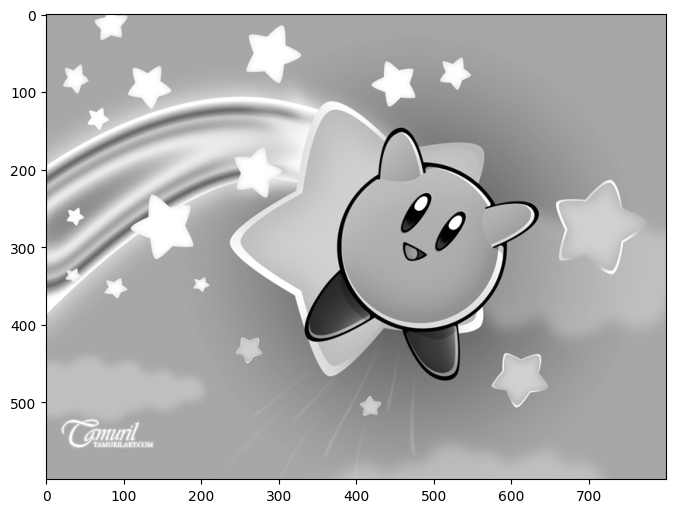

In [12]:
right_path = os.path.join(base_dir, 'bmp25.jpg')
img_feature = cv2.imread(right_path, 0)
show_img_gray(img_feature)

In [13]:
img_feature_part = cv2.imread(os.path.join(base_dir, 'bmp25_Part.jpg'), 0)
img_feature_part = cv2.rotate(img_feature_part, cv2.ROTATE_90_COUNTERCLOCKWISE)
img_feature_part = cv2.resize(img_feature_part, (190, 120))
img_feature_part2 = cv2.imread(os.path.join(base_dir, 'bmp25_Part2.jpg'), 0)
img_feature_part2 = cv2.rotate(img_feature_part2, cv2.ROTATE_90_CLOCKWISE)
img_feature_part2 = cv2.resize(img_feature_part2, (150, 200))
show_double_img(img_feature_part, img_feature_part2, gray=True)

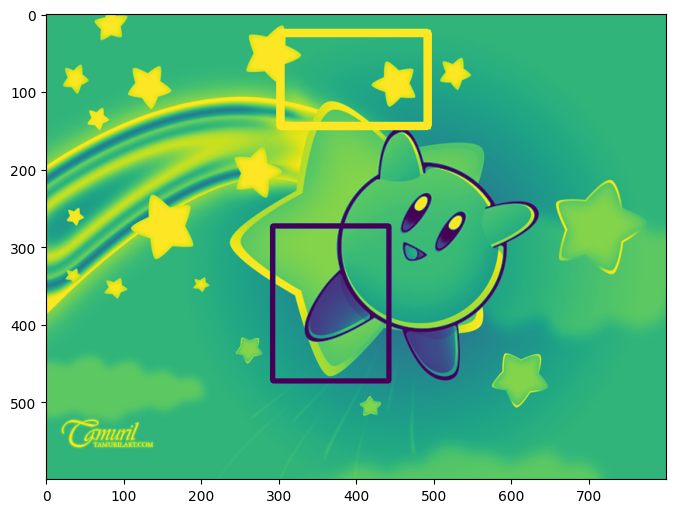

In [14]:
res = cv2.matchTemplate(img_feature, img_feature_part, cv2.TM_CCOEFF)
res2 = cv2.matchTemplate(img_feature, img_feature_part2, cv2.TM_CCOEFF)
show_double_img(res, res2, gray=True)

heigth, width = img_feature_part.shape
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + width, top_left[1] + heigth)
img_feature_copy = img_feature.copy()
cv2.rectangle(img_feature_copy, top_left, bottom_right, (255, 0, 0), 10)
heigth, width = img_feature_part2.shape
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res2)
top_left = max_loc
bottom_right = (top_left[0] + width, top_left[1] + heigth)
cv2.rectangle(img_feature_copy, top_left, bottom_right, (0, 255, 0), 5)
show_img(img_feature_copy)

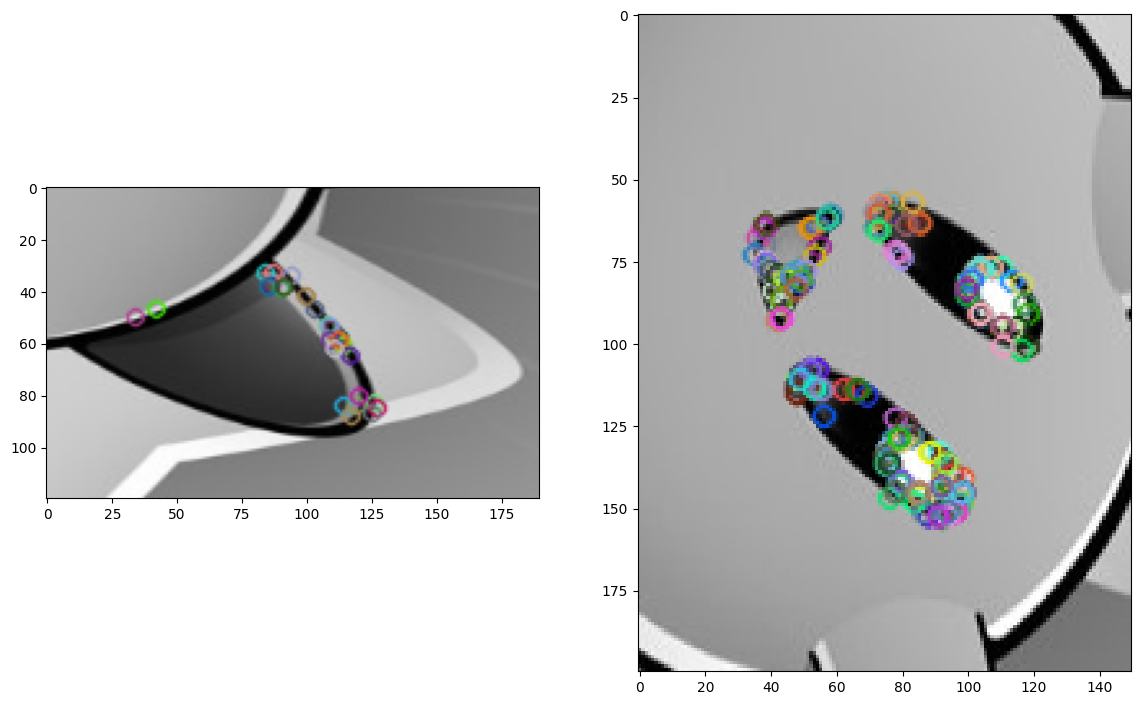

In [15]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img_feature, None)
kp2, des2 = orb.detectAndCompute(img_feature_part, None)
kp3, des3 = orb.detectAndCompute(img_feature_part2, None)
img_feature_kpts = cv2.drawKeypoints(img_feature, kp1, None)
img_feature_part1_kpts = cv2.drawKeypoints(img_feature_part, kp2, None)
img_feature_part2_kpts = cv2.drawKeypoints(img_feature_part2, kp3, None)
show_img(img_feature_kpts, 16)
show_double_img(img_feature_part1_kpts, img_feature_part2_kpts, 14)

In [16]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
single_match = matches[0]
single_match.distance

81.0

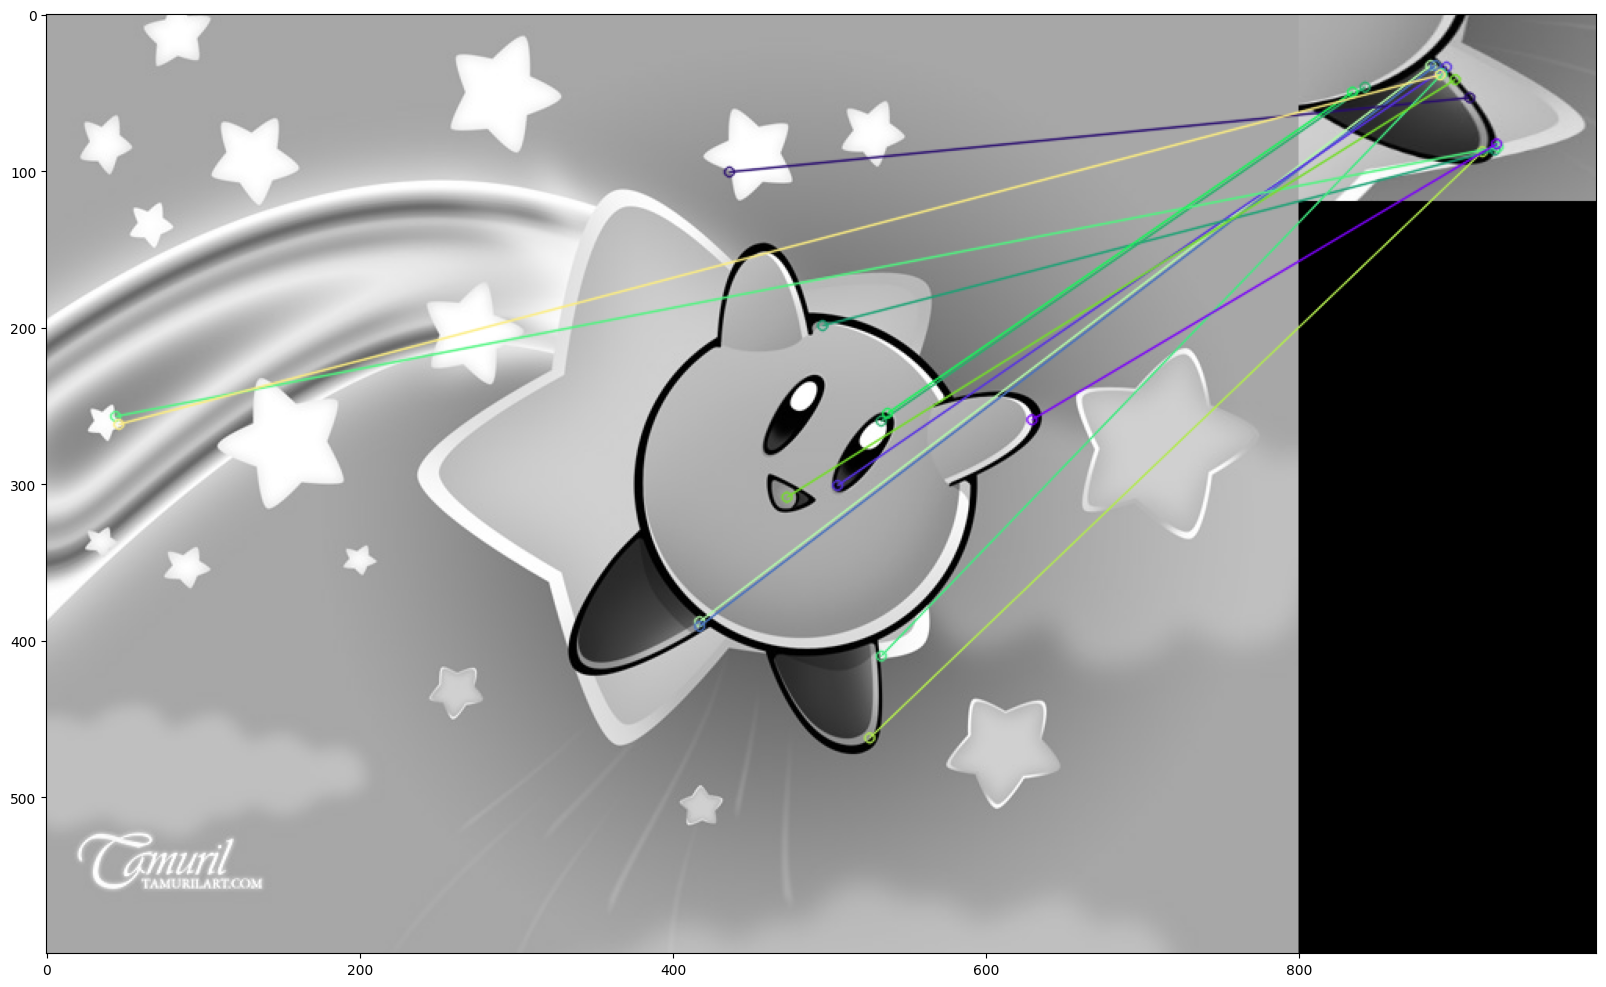

In [17]:
matches = sorted(matches, key=lambda x: x.distance)
feat_matches = cv2.drawMatches(img_feature, kp1, img_feature_part, kp2, matches[:25], None, flags=2)
show_img(feat_matches, 20)

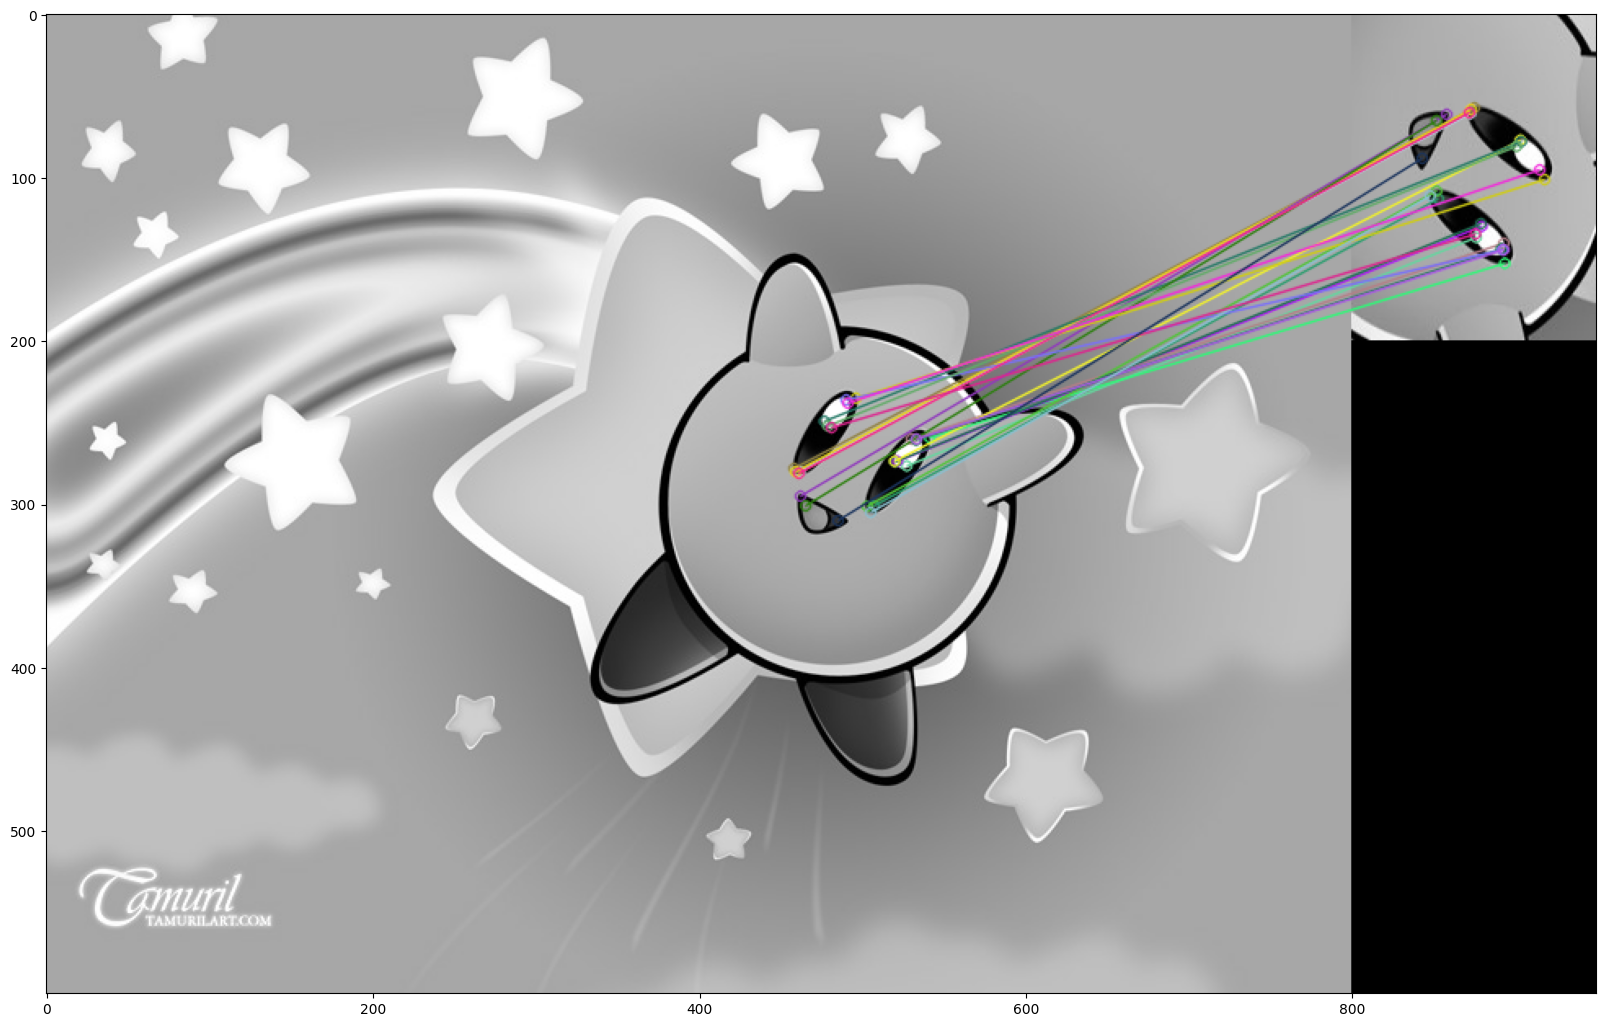

In [18]:
matches2 = bf.match(des1, des3)
matches2 = sorted(matches2, key=lambda x: x.distance)
feat_matches2 = cv2.drawMatches(img_feature, kp1, img_feature_part2, kp3, matches2[:25], None, flags=2)
show_img(feat_matches2, 20)

In [19]:
sift = cv2.xfeatures2d.SIFT_create()
kp1_sift, des1_sift = sift.detectAndCompute(img_feature, None)
kp2_sift, des2_sift = sift.detectAndCompute(img_feature_part, None)
kp3_sift, des3_sift = sift.detectAndCompute(img_feature_part2, None)
feature_kpts = cv2.drawKeypoints(img_feature, kp1_sift, None)
feature_part1_kpts = cv2.drawKeypoints(img_feature_part, kp2_sift, None)
feature_part2_kpts = cv2.drawKeypoints(img_feature_part2, kp3_sift, None)
show_img(feature_kpts, 16)
show_double_img(feature_part1_kpts, feature_part2_kpts, 14)

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

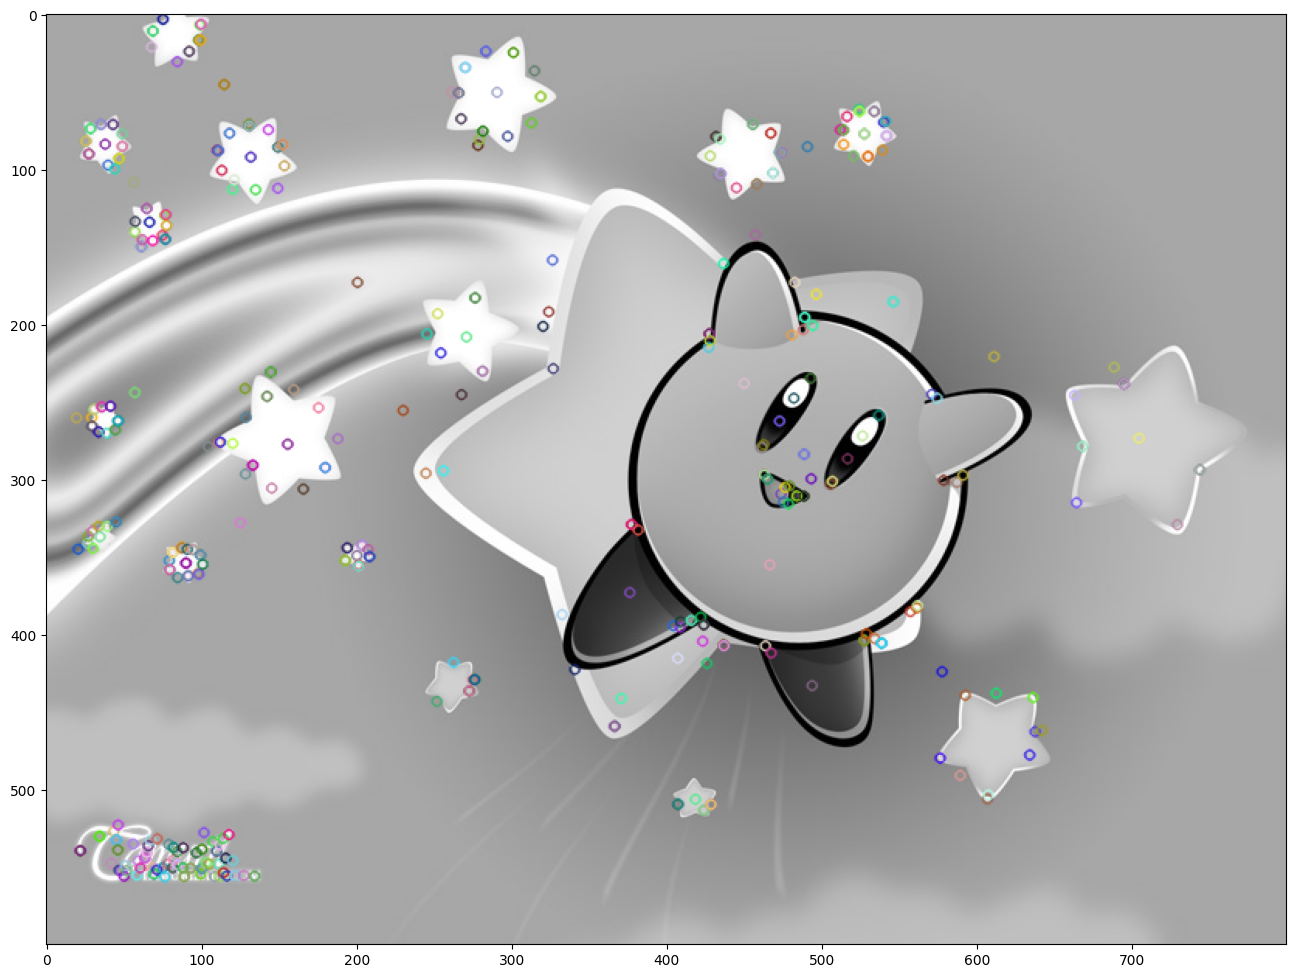

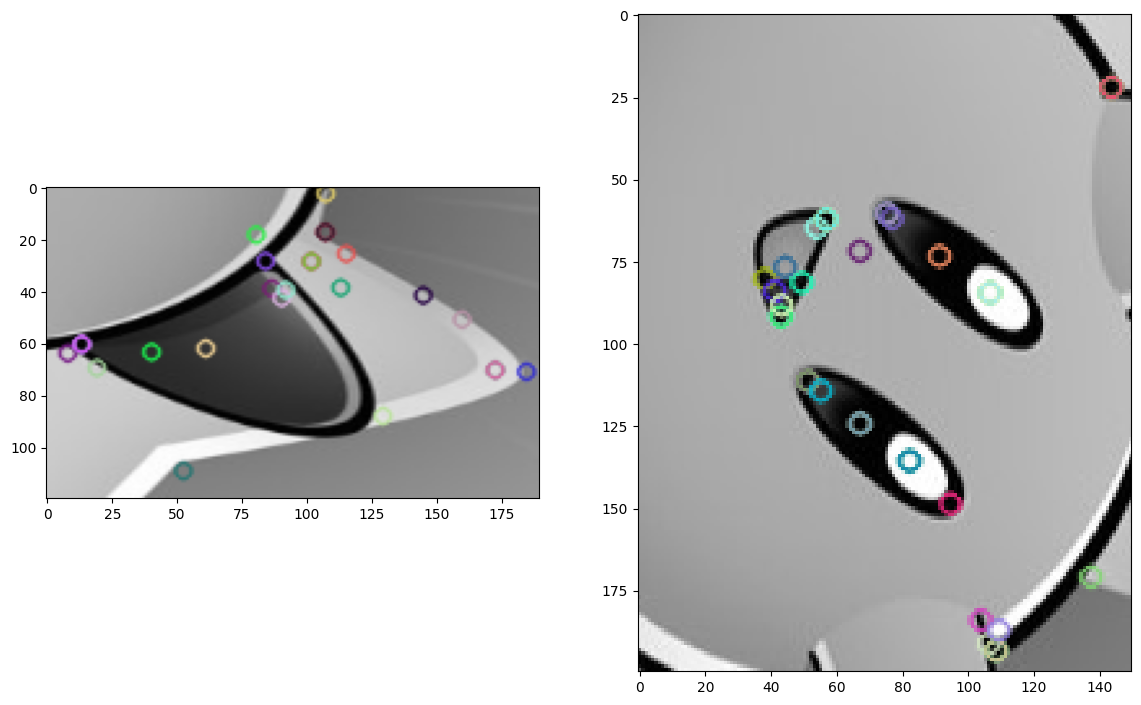

In [20]:
# Create a SIFT detector
sift = cv2.SIFT_create()

# Detect and compute SIFT features
kp1_sift, des1_sift = sift.detectAndCompute(img_feature, None)
kp2_sift, des2_sift = sift.detectAndCompute(img_feature_part, None)
kp3_sift, des3_sift = sift.detectAndCompute(img_feature_part2, None)

# Draw keypoints
feature_kpts = cv2.drawKeypoints(img_feature, kp1_sift, None)
feature_part1_kpts = cv2.drawKeypoints(img_feature_part, kp2_sift, None)
feature_part2_kpts = cv2.drawKeypoints(img_feature_part2, kp3_sift, None)

# Display the images
show_img(feature_kpts, 16)
show_double_img(feature_part1_kpts, feature_part2_kpts, 14)

In [ ]:
len(feature_part2_kpts)

In [ ]:
bf2 = cv2.BFMatcher()
sift_matches = bf2.knnMatch(des1_sift, des2_sift, k=2)
len(sift_matches)

In [ ]:
sift_matches

In [ ]:
good = []
for match1, match2 in sift_matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])
len(good)

In [ ]:
img_sift_matches = cv2.drawMatchesKnn(img_feature, kp1_sift, img_feature_part, kp2_sift, good, None, flags=2)
show_img(img_sift_matches, 20)

In [ ]:
img_sift_matches2 = cv2.drawMatchesKnn(img_feature, kp1_sift, img_feature_part2, kp3_sift, good, None, flags=2)
show_img(img_sift_matches2, 20)